<img src="https://live.staticflickr.com/2588/4171571040_bab4a40acf_z.jpg" width="600" height="300">

# XGBOOST

* XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

* Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.
* The idea of gradient boosting originated in the observation by Leo Breiman that boosting can be interpreted as an optimization algorithm on a suitable cost function. Explicit regression gradient boosting algorithms were subsequently developed by Jerome H. Friedman, simultaneously with the more general functional gradient boosting perspective of Llew Mason, Jonathan Baxter, Peter Bartlett and Marcus Frean.
* The latter two papers introduced the view of boosting algorithms as iterative functional gradient descent algorithms. That is, algorithms that optimize a cost function over function space by iteratively choosing a function (weak hypothesis) that points in the negative gradient direction. This functional gradient view of boosting has led to the development of boosting algorithms in many areas of machine learning and statistics beyond regression and classification.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import xgboost as xgb
import pickle
import seaborn as sns

from numpy import genfromtxt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.svm import SVC
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn import model_selection, metrics, linear_model
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
import scikitplot as skplt
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltimport 
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")
import sklearn.metrics as skm
import warnings
warnings.filterwarnings('ignore')
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

pd.set_option('display.max_columns', None)

Dataset loading

In [2]:
X_train = pd.read_csv("../data/x_train.csv")
Y_train = pd.read_csv("../data/y_train.csv")
X_test = pd.read_csv("../data/x_train.csv")
Y_test = pd.read_csv("../data/y_train.csv")

Pipelines

In [3]:
pp = '../pipelines/tratamiento1.sav'
preprocesador = pickle.load(open(pp, 'rb'))

# Model

In [4]:
%%time
modelo_xgboost = Pipeline(steps=[
    ('preprocesador', preprocesador),
    
    ('clasificador', xgb.XGBClassifier(random_state=1234))])

modelo_xgboost.fit(X_train, Y_train)

[12:56:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 28.1 s


Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['int_rate', 'annual_inc', 'fico_range_low', 'fico_range_high',
       'pub_rec', 'total_acc', 'last_fico_range_high', 'last_fico_range_low',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'avg_cur...
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_de

In [5]:
modelo_xgboost.score(X_train, Y_train)

0.9084359246197451

In [6]:
modelo_xgboost.score(X_test, Y_test)

0.9084359246197451

And we predict

In [7]:
Y_pred = modelo_xgboost.predict(X_test)

Additionally, we predict the probability of being default or fully paid


In [8]:
Y_prob = modelo_xgboost.predict_proba(X_test)

In [9]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     81750
           1       0.94      0.94      0.94    241783

    accuracy                           0.91    323533
   macro avg       0.88      0.88      0.88    323533
weighted avg       0.91      0.91      0.91    323533



## ROCs Curve

 It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis


ROC curves are usually in the form of a cumulative gain graph. The curve starts at the coordinate (0.0) and ends at the coordinate (1.1) as it moves from left to right. A graph that rises sharply to the coordinate (0.1) and then stabilizes is an indicator of a good classifier. A model that randomly classifies instances as hits or misses will follow the diagonal from the extreme left bottom to the extreme right top (shown in the graph if Include baseline is selected). If no confidence field is provided for a model, that model will be plotted as a single point. The classifier with the optimal classification threshold is closest to the coordinate (0.1) or top left corner of the graph. This location represents a large number of instances that are correctly classified as hits, and a low number of instances that are incorrectly classified as hits. The points above the diagonal line represent good classification results. The points below the diagonal line represent bad classification results, worse than if the instances had been classified randomly.

In [10]:
def roc(model, title):
    
    y_pred_prob = model.predict_proba(X_test)
    
    skplt.metrics.plot_roc(Y_test, y_pred_prob) 

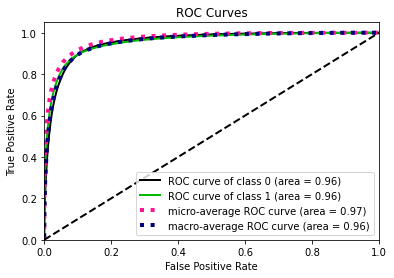

In [11]:
roc(modelo_xgboost, 'Gradient Boost')

## Confusion Matrix

In the field of artificial intelligence and especially in the problem of statistical classification, a confounding matrix is a tool that allows the visualisation of the performance of an algorithm used in supervised learning. Each column of the matrix represents the number of predictions of each class, while each row represents the instances in the real class. One of the benefits of confounding matrices is that they make it easier to see if the system is confusing two classes.

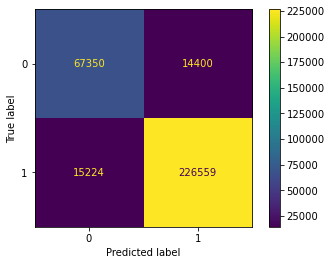

In [12]:
plot_confusion_matrix(modelo_xgboost, X=X_test, y_true=Y_test);

According to our confussion Matrix we can observe the following:

+ 67350 True Negatives.
+ 14400 False Positives.
+ 15224 False Negatives.
+ 226559 True Postives.

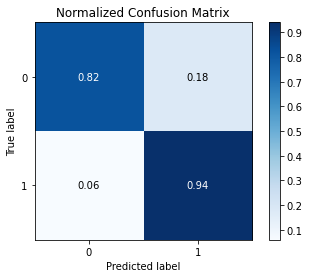

In [13]:

modelprediction_labels = modelo_xgboost.predict(X_test)
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, normalize=True);  

## Cumulative Gains

Cumulative profit charts always start at 0% and end at 100% from left to right. To get a good model, the profit graph should increase considerably towards 100% and then decrease. Models that do not provide information will show a diagonal from the lower left to upper right corner (shown on the graph if Include Baseline is selected).

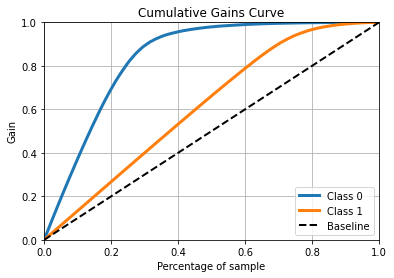

In [14]:

skplt.metrics.plot_cumulative_gain(Y_test, Y_prob);

Model is saved

In [15]:
model = '../model/xgboost.sav'
pickle.dump(modelo_xgboost, open(model, 'wb'))

## Optimization of the model

In [16]:
parametros = {
    'clasificador__n_estimator':[200,500], #numero de estimadores optimo
    'clasificador__max_features':['auto', 'sqrt', 'log2'], #metodo optimo para evaluar los features
    'clasificador__max_depth':[4,5,8], #profundidad del modelo
    'clasificador__criterion':['gini', 'entropy'] #mel mejor criterio para estimar
}  

In [17]:
%%time
modelo_xgboost = xgb.XGBClassifier(random_state=1234,eval_metric= 'error')

Wall time: 0 ns


In [18]:
modelo_optimo = RandomizedSearchCV(modelo_xgboost, parametros, cv=10, random_state=1234)

In [19]:
%%time
modelo_optimo.fit(X_train, Y_train)

[12:57:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { clasificador__criterion, clasificador__max_depth, clasificador__max_features, clasificador__n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:57:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { clasificador__criterion, clasificador__max_depth, clasificador__max_features, clasificador__n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:57:58] WARNING: C:/Users/Administr

[13:06:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { clasificador__criterion, clasificador__max_depth, clasificador__max_features, clasificador__n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:06:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { clasificador__criterion, clasificador__max_depth, clasificador__max_features, clasificador__n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:07:02] WARNING: C:/Users/Administr

[13:15:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { clasificador__criterion, clasificador__max_depth, clasificador__max_features, clasificador__n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:15:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { clasificador__criterion, clasificador__max_depth, clasificador__max_features, clasificador__n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:16:04] WARNING: C:/Users/Administr

[13:22:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { clasificador__criterion, clasificador__max_depth, clasificador__max_features, clasificador__n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:23:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { clasificador__criterion, clasificador__max_depth, clasificador__max_features, clasificador__n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:23:36] WARNING: C:/Users/Administr

[13:30:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { clasificador__criterion, clasificador__max_depth, clasificador__max_features, clasificador__n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:30:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { clasificador__criterion, clasificador__max_depth, clasificador__max_features, clasificador__n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:30:47] WARNING: C:/Users/Administr

[13:37:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { clasificador__criterion, clasificador__max_depth, clasificador__max_features, clasificador__n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:37:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { clasificador__criterion, clasificador__max_depth, clasificador__max_features, clasificador__n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:37:51] WARNING: C:/Users/Administr

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='error', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=N...
                                           random_state=1234, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [20]:
modelo_optimo.score(X_train, Y_train)

0.9102564498830104

In [21]:
modelo_optimo.score(X_test, Y_test)

0.9102564498830104

We predict

In [22]:
Y_pred = modelo_optimo.predict(X_test)

In [23]:
Y_prob = modelo_optimo.predict_proba(X_test)

In [24]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82     81750
           1       0.94      0.94      0.94    241783

    accuracy                           0.91    323533
   macro avg       0.88      0.88      0.88    323533
weighted avg       0.91      0.91      0.91    323533



## ROCs Curve

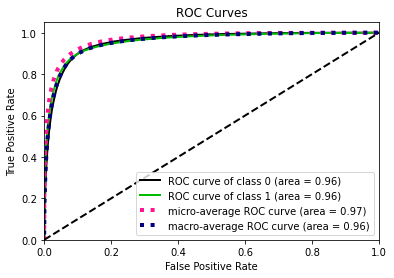

In [25]:
roc(modelo_optimo, 'Optimised Gradient Boost')

## Confusion Matrix

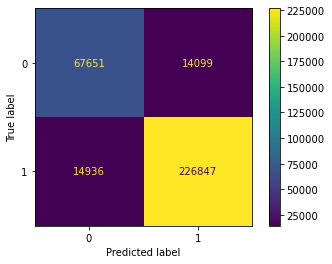

In [26]:
plot_confusion_matrix(modelo_optimo, X=X_test, y_true=Y_test);

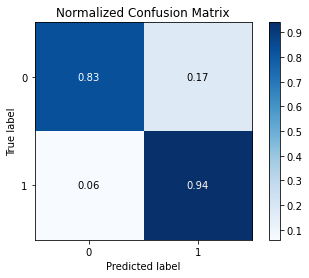

In [27]:

modelprediction_labels = modelo_optimo.predict(X_test)
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, normalize=True);  

## Cumulative gains

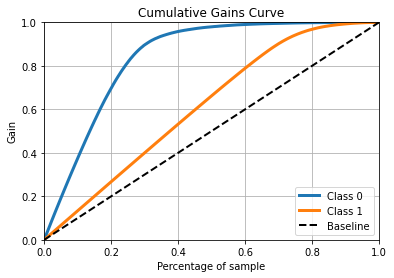

In [28]:

skplt.metrics.plot_cumulative_gain(Y_test, Y_prob);

In [29]:
model1 = '../model/xgboost_optimo.sav'
pickle.dump(modelo_optimo, open(model1, 'wb'))

# References